- 先ずは変数毎の正規化を入れないとおかしくないですか？
- 
# pickleに吐いて，可視化
- 誤差が下がるようす
- エピソード毎の報酬の経過

In [85]:
ll

total 3948
drwxr-xr-x 2 shigeharu    1024 Dec  7 19:21 base01/
-rw-r--r-- 1 shigeharu   19258 Dec  5 17:34 base_line_dqn.py
-rw-r--r-- 1 shigeharu    4544 Dec  5 17:34 baseline.py
-rw-r--r-- 1 shigeharu   20277 Dec  4 18:24 curio_dqn.py
-rw-r--r-- 1 shigeharu    1724 Dec  3 11:08 double_dqn.py
-rw-r--r-- 1 shigeharu      41 Dec  4 22:06 dumy.py
-rw-r--r-- 1 shigeharu   11402 Dec  2 12:36 example.ipynb
drwxr-xr-x 3 shigeharu     512 Dec  7 19:20 gate01/
-rw-r--r-- 1 shigeharu    5867 Dec  5 21:14 gate_code1.py
-rw-r--r-- 1 shigeharu    5872 Dec  7 19:28 gate_code2.py
-rw-r--r-- 1 shigeharu   21263 Dec  7 19:26 gated_curio_dqn.py
-rw-r--r-- 1 shigeharu    4529 Dec  2 21:34 graph2.dot
-rw-r--r-- 1 shigeharu    4894 Dec  2 20:53 graph.dot
-rw-r--r-- 1 shigeharu   41960 Dec  3 01:41 hard_cartpole.ipynb
-rw-r--r-- 1 shigeharu    8451 Dec  4 22:19 hard_cartpole_noisy.py
-rw-r--r-- 1 shigeharu    8532 Dec  5 21:12 hard_cartpole.py
-rw-r--r-- 1 shigeharu  198716 Dec  7 19:57 health_check.ipynb


In [86]:
import glob
all_names = glob.glob('gate_rec01_*std10_loop20.pickle')

In [87]:
import glob
all_names = glob.glob('gate_rec01_*std10_loop20.pickle')
import pickle
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [88]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [89]:
import math
def draw_int_rew(data,i,gate=False):
    plt.figure(figsize=(6, 5),facecolor="gray")
    x = [math.sin(rad) for rad in data['target'][i]]
    y = [math.cos(rad) for rad in data['target'][i]]
    losses = [d[0] for d in data['target_losses'][i]]
        
    plt.rcParams["axes.facecolor"] = (1,1,1,0)
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1,1.1)
    plt.scatter(x,y,s=5,cmap='magma',c=losses)
    if gate:
        x = [math.sin(rad)*0.8 for rad in data['target'][i]]
        y = [math.cos(rad)*0.8 for rad in data['target'][i]]
        losses = [d[0] for d in data['target_a_losses'][i]]
        plt.scatter(x,y,s=5,cmap='magma',c=losses)
    plt.colorbar()

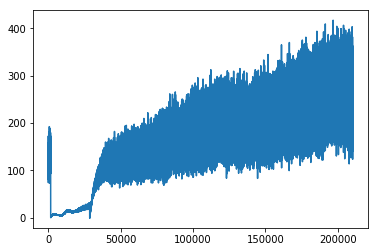

In [21]:
data = []
for an in all_names:
    with open(an,mode='rb') as f:
        data += pickle.load(f)["qt+i_r"]
plt.plot(list(range(len(data))), [float(sum(d.array)/len(d.array)) for d in data])

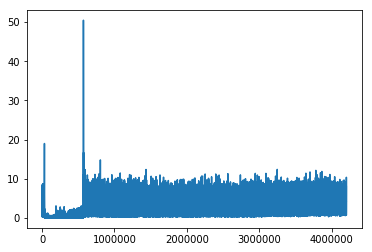

In [23]:
data = []
for an in all_names:
    with open(an,mode='rb') as f:
        data += [d for i, d in enumerate(pickle.load(f)['loss']) if i%10==0]
plt.plot(list(range(len(data))), [float(d.array) for d in data])

In [ ]:
data = []
for an in all_names:
    with open(an,mode='rb') as f:
        data += [d for i, d in enumerate(pickle.load(f)["qt+i_r"]) if i%10==0]
plt.plot(list(range(len(data))), data)

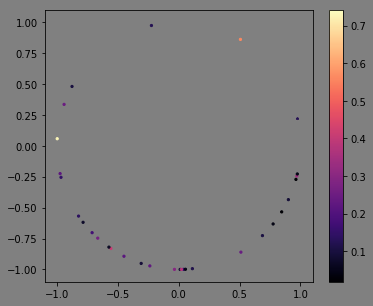

In [52]:
draw_int_rew(data,len(data['target_losses'])-1)

In [41]:
glob.glob('gate_rec01_*')

['gate_rec01_std10_loop20.pickle',
 'gate_rec01_10_std10_loop20.pickle',
 'gate_rec01_20_std10_loop20.pickle',
 'gate_rec01_30_std10_loop20.pickle',
 'gate_rec01_40_std10_loop20.pickle',
 'gate_rec01_50_std10_loop20.pickle',
 'gate_rec01_60_std10_loop20.pickle',
 'gate_rec01_70_std10_loop20.pickle',
 'gate_rec01_80_std10_loop20.pickle',
 'gate_rec01_90_std10_loop20.pickle',
 'gate_rec01_100_std10_loop20.pickle',
 'gate_rec01_110_std10_loop20.pickle',
 'gate_rec01_120_std10_loop20.pickle',
 'gate_rec01_130_std10_loop20.pickle',
 'gate_rec01_140_std10_loop20.pickle',
 'gate_rec01_150_std10_loop20.pickle',
 'gate_rec01_160_std10_loop20.pickle',
 'gate_rec01_170_std10_loop20.pickle',
 'gate_rec01_180_std10_loop20.pickle',
 'gate_rec01_190_std10_loop20.pickle',
 'gate_rec01_200_std10_loop20.pickle',
 'gate_rec01_210_std10_loop20.pickle',
 'gate_rec01_220_std10_loop20.pickle',
 'gate_rec01_230_std10_loop20.pickle',
 'gate_rec01_240_std10_loop20.pickle',
 'gate_rec01_250_std10_loop20.pickle',

In [42]:
# 07 は普通の好奇心，ノイズなし

In [117]:
glob.glob('logs/gate_rec03_*')

['logs/gate_rec03_100_std10_loop1.pickle']

In [162]:
import glob
all_names = glob.glob('logs/gate_rec03_*')
import pickle
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [163]:
data = {"qt+i_r":[],
       'reward':[],
       "loss":[],
       "loss_a":[]}
for j,an in enumerate(all_names):
    print(j,len(all_names))
    with open(an,mode='rb') as f:
        tmp = pickle.load(f)
        data["qt+i_r"] += [d for i, d in enumerate(tmp["qt+i_r"]) if i%100==0]
        data['reward'] += [d for i, d in enumerate(tmp['reward'])]
        data["loss"] += [d for i, d in enumerate(tmp["loss"]) if i%100==0]
        data["loss_a"] += [d for i, d in enumerate(tmp["loss_a"]) if i%100==0]

0 1


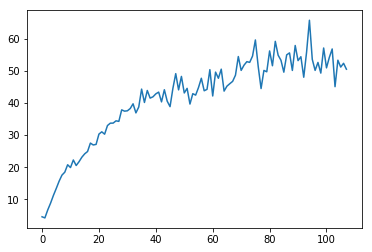

In [164]:
plt.plot(list(range(len(data["qt+i_r"]))), [float(sum(d.array)/len(d.array)) for d in data["qt+i_r"]])

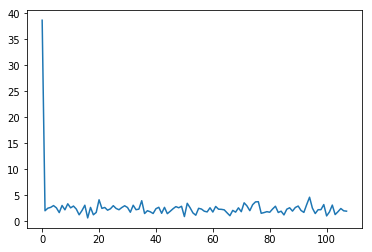

In [165]:
plt.plot(list(range(len(data["loss"]))), [float(d.array) for d in data["loss"]])

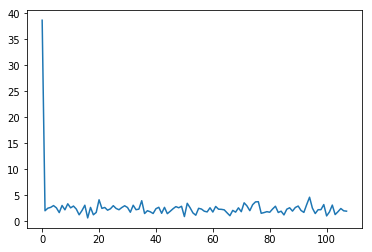

In [166]:
plt.plot(list(range(len(data["loss_a"]))), [float(d.array) for d in data["loss_a"]])

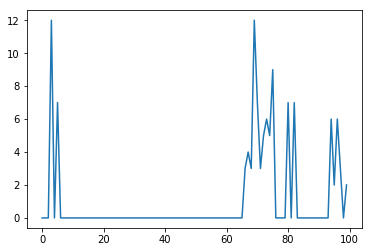

In [167]:
plt.plot(list(range(len(data['reward']))), data['reward'])

In [168]:
len(all_names)

1

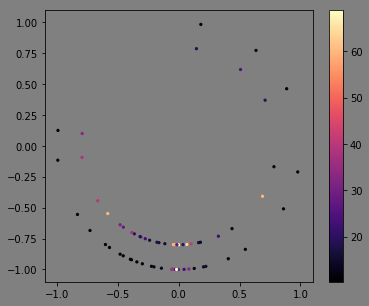

In [171]:
num = 0
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,len(data['target_losses'])-1,gate=True)

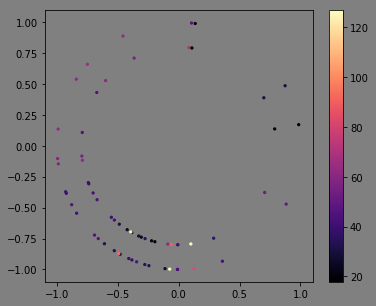

In [173]:
draw_int_rew(data,0,gate=True)

In [23]:
with open(all_names[0],mode='rb') as f:
    data = pickle.load(f)

In [10]:
data.keys()

dict_keys(['target_losses', 'reward', 'loss_a', 'qt+i_r', 'loss', 'target', 'target_a_losses'])

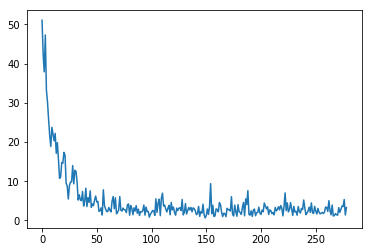

In [49]:
plt.plot(list(range(len(data["loss"])))[:1000], [float(d.array) for d in data["loss"]][:1000])